## Assignment 1
### Vivek Kumar Khetan
UT-EID - vkk287

In [1]:
import scipy.io
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
directory = '/Users/Vivek/Dropbox/Spring17/ML/Assingments/Assignment1' # Please put the path to your directory haveing digits.mat

In [3]:
images = scipy.io.loadmat('digits.mat')


In [4]:
images.keys()

dict_keys(['trainLabels', 'testImages', '__globals__', '__version__', 'testLabels', 'trainImages', '__header__'])

In [5]:
trainImages = images['trainImages']
trainLabels = images['trainLabels']
testImages = images['testImages']
testLabels = images['testLabels']

In [6]:
trainImages.shape, trainLabels.shape

((28, 28, 1, 60000), (1, 60000))

In [7]:
trainImages.shape

(28, 28, 1, 60000)

In [8]:
testImages.shape, testLabels.shape

((28, 28, 1, 10000), (1, 10000))

In [9]:
trainImages = trainImages.reshape(784, 60000) 
testImages = testImages.reshape(784, 10000)

In [10]:
trainImages.shape, testImages.shape

((784, 60000), (784, 10000))

In [11]:
# Let's define a variable size, size of training dataset we want to use
size = 200

In [12]:
train = trainImages[:,:size] #Taking differnt no of Images for analysis
# train = trainImages[:,:]


In [13]:
train.shape # Now, we have a train ndarray with 200 Images and each with 784 pixels

(784, 200)

In [14]:
# Let's get the Similarity Matrix for these 20 Images
train_ave = train.mean(1)
train_ave = train_ave.reshape(train_ave.size,1)
train_ave.shape

(784, 1)

In [15]:
train_final = train - train_ave 
test_final = testImages - train_ave
train_final.shape, test_final.shape # Now, we have a training matrix without the similaroty values

((784, 200), (784, 10000))

In [16]:
train.shape, train_ave.shape, train_final.shape

((784, 200), (784, 1), (784, 200))

In [17]:
B = np.matmul(train_final.T, train_final) 
B.shape, B.max()

((200, 200), 7381816.2950000027)

In [18]:
# Let's find eigen vector for B matrix, we will pre multiply it's eigen vector 
# to train_final to get eigen vector matrix of cov-variance matrix
val, vec = LA.eig(B)

In [19]:
val.shape, vec.shape

((200,), (200, 200))

In [20]:
val_sorted = np.sort(val)
vec_sorted = vec[:, val.argsort()[::-1]]
#vec_sorted[:] = vec_sorted[::-1]
#val_sorted[::-1],vec_sorted

In [21]:

# now, to get Eigen vector of Co-variance matrix, premultiply with train_final
# Eigen Values of co-variance Matrix remains the same
eig_cov = np.dot(train_final,vec_sorted)  #train_size X 784 #matmul and dot does the same thing
eig_cov.shape

(784, 200)

In [22]:
eig_cov = eig_cov[:,0:15]

In [23]:
eig_cov_t = eig_cov.T


In [24]:
train_proj = np.dot(eig_cov_t, train_final)
test_proj = np.dot(eig_cov_t, test_final)

In [25]:
train_proj.shape, test_proj.shape

((15, 200), (15, 10000))

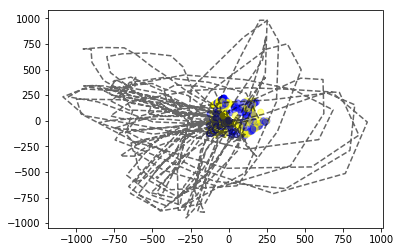

In [26]:
# First two images
plt.scatter(train_final[:,0], train_final[:,1], alpha = 0.45,  c=('yellow', 'blue'))
plt.plot(eig_cov[:,0],eig_cov[:,1],'--', alpha = .6, c = ('black'))
#plt.plot([0,eig[:,0]], [0,eig[:,1]], 'y-', lw = 2)
plt.show()

In [27]:
train_proj_labels = trainLabels.flatten()[:size]
train_proj_labels.shape


(200,)

In [28]:
test_proj_labels = testLabels.flatten()

In [29]:
xtrain, ytrain, xtest, ytest = train_proj.T, train_proj_labels, test_proj.T, test_proj_labels

In [30]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((200, 15), (200,), (10000, 15), (10000,))

In [31]:
## Let's make a K nearest Neighbor Classifier
model = KNeighborsClassifier()


In [32]:
# Let's fit training data to the model
model.fit(xtrain,ytrain)
print(model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [33]:
expected = ytest

In [34]:
predicted = model.predict(xtest)

In [35]:
expected[1],predicted[1]

(2, 2)

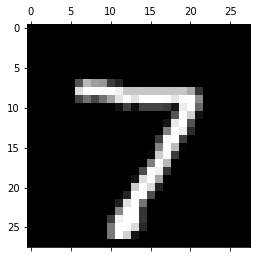

In [36]:
# Construction of the test digit in the projected eigen space
pl1=plt.matshow(testImages[:,0].reshape(28,28), cmap=plt.cm.gray)
plt.show()

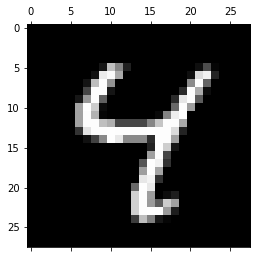

In [37]:
p22=plt.matshow(testImages[:,6].reshape(28,28), cmap=plt.cm.gray)
plt.show()

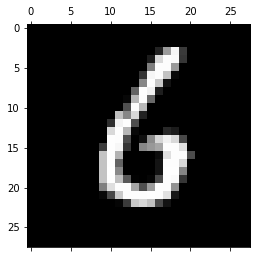

In [38]:
p66=plt.matshow(testImages[:,50].reshape(28,28), cmap=plt.cm.gray)
plt.show()

In [39]:
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       0.80      0.90      0.85       980
          1       0.78      0.99      0.87      1135
          2       0.74      0.66      0.70      1032
          3       0.65      0.78      0.71      1010
          4       0.65      0.70      0.67       982
          5       0.66      0.33      0.44       892
          6       0.83      0.75      0.79       958
          7       0.80      0.50      0.62      1028
          8       0.63      0.62      0.63       974
          9       0.50      0.68      0.58      1009

avg / total       0.71      0.70      0.69     10000



In [40]:
print(metrics.confusion_matrix(expected, predicted))

[[ 884    0   17    1    6   35   25    4    5    3]
 [   0 1119    0    4    0    5    1    0    6    0]
 [  22   91  683   43   22   18   27   28   96    2]
 [  23   37   34  791    4   36    3    2   68   12]
 [   1   23   15    1  683    1   24    7    3  224]
 [  61   18   28  222   20  290   39   23  127   64]
 [  46   32   63    0   63   23  719    8    3    1]
 [   1   65   29   14   34    2    1  513   29  340]
 [  54   25   45  132   17   29   20   15  606   31]
 [  12   19    8   16  205    0    3   38   18  690]]


In [41]:
accuracy_score(expected, predicted)

0.69779999999999998

# Now, I will work on 5 cases: and compare accuracy -  

1. changing training sample size from 40 to 700 with steps of 50 and using first 10  eigen vector
2. changing training sample size from 40 to 700 with steps of 50 and using first 50  eigen vector
3. changing training sample size from 40 to 700 with steps of 50 and using all the eigen vector
4. Using 100 Training Images and varying Eigen Vector size from 10 to maximum value
5. Using 200 Training Images and varying Eigen Vector size from 10 to maximum value
6. Using 500 Training Images and varying Eigen Vector size from 10 to maximum value
7. Using 700 Training Images and varying Eigen Vector size from 10 to maximum value



## changing training sample size from 40 to 700 with steps of 50 and using first 10  eigen vector




In [42]:
accuracy_measure1 = []
train_size1 = []
for i in range(40,700,50):
    trainImages = images['trainImages']
    trainLabels = images['trainLabels']
    testImages = images['testImages']
    testLabels = images['testLabels']
    
    trainImages = trainImages.reshape(784, 60000) 
    testImages = testImages.reshape(784, 10000)
    
    train = trainImages[:,:i] #Taking differnt no of Images for analysis
    
    train_ave = train.mean(1)
    train_ave = train_ave.reshape(train_ave.size,1)
    
    train_final = train - train_ave 
    test_final = testImages - train_ave
    
    B = np.matmul(train_final.T, train_final) 
    
    val, vec = LA.eig(B)
    val_sorted = np.sort(val)
    vec_sorted = vec[:, val.argsort()[::-1]]

    eig_cov = np.dot(train_final,vec_sorted)  #train_size X 784 #matmul and dot does the same thing
   
    eig_cov = eig_cov[:,:10]

    eig_cov_t = eig_cov.T

    train_proj = np.dot(eig_cov_t, train_final)
    test_proj = np.dot(eig_cov_t, test_final)
    
    train_proj_labels = trainLabels.flatten()[:i]
    test_proj_labels = testLabels.flatten()

    xtrain, ytrain, xtest, ytest = train_proj.T, train_proj_labels, test_proj.T, test_proj_labels

    model = KNeighborsClassifier()
    model.fit(xtrain,ytrain)
    expected = ytest
    predicted = model.predict(xtest)
    accuracy = accuracy_score(expected, predicted)
    
    train_size1.append(i)
    accuracy_measure1.append(accuracy)
    
print("For top 10 Eigen Vectors: ")

print("TrainImages Size:" + str(train_size1))  ,print("Accuracy: "+str(accuracy_measure1))  

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:382: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


For top 10 Eigen Vectors: 
TrainImages Size:[40, 90, 140, 190, 240, 290, 340, 390, 440, 490, 540, 590, 640, 690]
Accuracy: [0.47799999999999998, 0.5887, 0.66769999999999996, 0.68469999999999998, 0.70230000000000004, 0.73409999999999997, 0.75209999999999999, 0.76129999999999998, 0.75949999999999995, 0.77080000000000004, 0.78320000000000001, 0.78900000000000003, 0.79590000000000005, 0.80110000000000003]


(None, None)

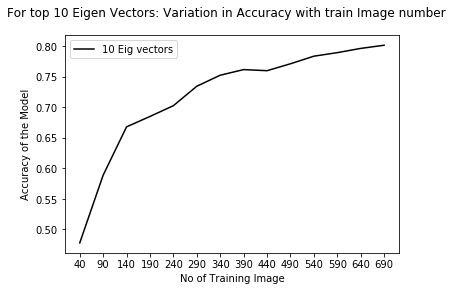

In [43]:
#fig1= plt.figure()
plot1= plt.plot(train_size1, accuracy_measure1, '-', c = ('black'), label = '10 Eig vectors')
plt.suptitle('For top 10 Eigen Vectors: Variation in Accuracy with train Image number')
plt.xlabel('No of Training Image')
plt.ylabel('Accuracy of the Model')
plt.xticks(train_size1)
plt.legend()
plt.show()

## changing training sample size from 40 to 700 with steps of 50 and using first 50  eigen vector

In [44]:
accuracy_measure2 = []
train_size2 = []
for i in range(40,700,50):
    trainImages = images['trainImages']
    trainLabels = images['trainLabels']
    testImages = images['testImages']
    testLabels = images['testLabels']
    
    trainImages = trainImages.reshape(784, 60000) 
    testImages = testImages.reshape(784, 10000)
    
    train = trainImages[:,:i] #Taking differnt no of Images for analysis
    
    train_ave = train.mean(1)
    train_ave = train_ave.reshape(train_ave.size,1)
    
    train_final = train - train_ave 
    test_final = testImages - train_ave
    
    B = np.matmul(train_final.T, train_final) 
    
    val, vec = LA.eig(B)
    val_sorted = np.sort(val)
    vec_sorted = vec[:, val.argsort()[::-1]]

    eig_cov = np.dot(train_final,vec_sorted)  #train_size X 784 #matmul and dot does the same thing
   
    eig_cov = eig_cov[:,:50]

    eig_cov_t = eig_cov.T

    train_proj = np.dot(eig_cov_t, train_final)
    test_proj = np.dot(eig_cov_t, test_final)
    
    train_proj_labels = trainLabels.flatten()[:i]
    test_proj_labels = testLabels.flatten()

    xtrain, ytrain, xtest, ytest = train_proj.T, train_proj_labels, test_proj.T, test_proj_labels

    model = KNeighborsClassifier()
    model.fit(xtrain,ytrain)
    expected = ytest
    predicted = model.predict(xtest)
    accuracy = accuracy_score(expected, predicted)
    
    train_size2.append(i)
    accuracy_measure2.append(accuracy)
    
print("For top 50 Eigen Vectors: ")
print("TrainImages Size:" + str(train_size2)), print("Accuracy: "+str(accuracy_measure2))


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:382: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


For top 50 Eigen Vectors: 
TrainImages Size:[40, 90, 140, 190, 240, 290, 340, 390, 440, 490, 540, 590, 640, 690]
Accuracy: [0.48399999999999999, 0.61029999999999995, 0.67659999999999998, 0.70369999999999999, 0.73409999999999997, 0.76239999999999997, 0.77829999999999999, 0.78920000000000001, 0.79469999999999996, 0.80530000000000002, 0.81899999999999995, 0.82499999999999996, 0.83250000000000002, 0.84099999999999997]


(None, None)

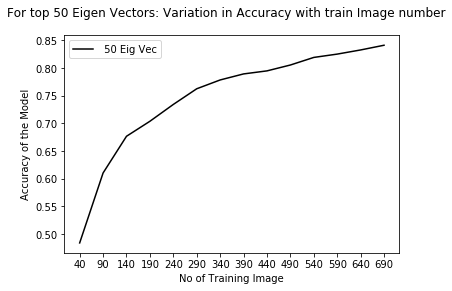

In [45]:
plot2= plt.plot(train_size2, accuracy_measure2, '-', c = ('black'), label = ' 50 Eig Vec')
plt.suptitle('For top 50 Eigen Vectors: Variation in Accuracy with train Image number')
plt.xlabel('No of Training Image')
plt.ylabel('Accuracy of the Model')
plt.xticks(train_size2)
plt.legend()
plt.show()

## changing training sample size from 40 to 700 with steps of 50 and using all the eigen vector

In [46]:
accuracy_measure3 = []
train_size3 = []
for i in range(40,780,50):
    trainImages = images['trainImages']
    trainLabels = images['trainLabels']
    testImages = images['testImages']
    testLabels = images['testLabels']
    
    trainImages = trainImages.reshape(784, 60000) 
    testImages = testImages.reshape(784, 10000)
    
    train = trainImages[:,:i] #Taking differnt no of Images for analysis
    
    train_ave = train.mean(1)
    train_ave = train_ave.reshape(train_ave.size,1)
    
    train_final = train - train_ave 
    test_final = testImages - train_ave
    
    B = np.matmul(train_final.T, train_final) 
    
    val, vec = LA.eig(B)
    val_sorted = np.sort(val)
    vec_sorted = vec[:, val.argsort()[::-1]]

    eig_cov = np.dot(train_final,vec_sorted)  #train_size X 784 #matmul and dot does the same thing
   
    #eig_cov = eig_cov[:,:]

    eig_cov_t = eig_cov.T

    train_proj = np.dot(eig_cov_t, train_final)
    test_proj = np.dot(eig_cov_t, test_final)
    
    train_proj_labels = trainLabels.flatten()[:i]
    test_proj_labels = testLabels.flatten()

    xtrain, ytrain, xtest, ytest = train_proj.T, train_proj_labels, test_proj.T, test_proj_labels

    model = KNeighborsClassifier()
    model.fit(xtrain,ytrain)
    expected = ytest
    predicted = model.predict(xtest)
    accuracy = accuracy_score(expected, predicted)
    
    train_size3.append(i)
    accuracy_measure3.append(accuracy)
    
print("For all the Eigen Vectors: ")
print("TrainImages Size:" + str(train_size3)), print("Accuracy: "+str(accuracy_measure3))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:382: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


For all the Eigen Vectors: 
TrainImages Size:[40, 90, 140, 190, 240, 290, 340, 390, 440, 490, 540, 590, 640, 690, 740]
Accuracy: [0.48399999999999999, 0.61150000000000004, 0.67769999999999997, 0.70289999999999997, 0.73409999999999997, 0.76219999999999999, 0.77829999999999999, 0.78949999999999998, 0.79359999999999997, 0.80559999999999998, 0.81969999999999998, 0.82540000000000002, 0.83279999999999998, 0.84009999999999996, 0.84350000000000003]


(None, None)

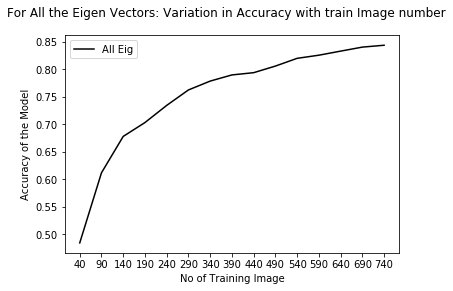

In [47]:
plot3= plt.plot(train_size3, accuracy_measure3, '-', c = ('black'), label = 'All Eig')
plt.suptitle('For All the Eigen Vectors: Variation in Accuracy with train Image number')
plt.xlabel('No of Training Image')
plt.ylabel('Accuracy of the Model')
plt.xticks(train_size3)
plt.legend()
plt.show()

## Using 100 Training Images and varying Eigen Vector size from 10 to maximum value

In [48]:
accuracy_measure4 = []
eig_size4 = []
train_size = 100
for v in range(10,train_size,int(train_size/20)):
    trainImages = images['trainImages']
    trainLabels = images['trainLabels']
    testImages = images['testImages']
    testLabels = images['testLabels']
    
    trainImages = trainImages.reshape(784, 60000) 
    testImages = testImages.reshape(784, 10000)
    
    train = trainImages[:,:train_size] #Taking differnt no of Images for analysis
    
    train_ave = train.mean(1)
    train_ave = train_ave.reshape(train_ave.size,1)
    
    train_final = train - train_ave 
    test_final = testImages - train_ave
    
    B = np.matmul(train_final.T, train_final) 
    
    val, vec = LA.eig(B)
    val_sorted = np.sort(val)
    vec_sorted = vec[:, val.argsort()[::-1]]

    eig_cov = np.dot(train_final,vec_sorted)  #train_size X 784 #matmul and dot does the same thing
   
    eig_cov = eig_cov[:,:v]

    eig_cov_t = eig_cov.T

    train_proj = np.dot(eig_cov_t, train_final)
    test_proj = np.dot(eig_cov_t, test_final)
    
    train_proj_labels = trainLabels.flatten()[:train_size]
    test_proj_labels = testLabels.flatten()

    xtrain, ytrain, xtest, ytest = train_proj.T, train_proj_labels, test_proj.T, test_proj_labels

    model = KNeighborsClassifier()
    model.fit(xtrain,ytrain)
    expected = ytest
    predicted = model.predict(xtest)
    accuracy = accuracy_score(expected, predicted)
    
    eig_size4.append(v)
    accuracy_measure4.append(accuracy)

print("For 100 Training Images :")
print("eig_size: " + str(eig_size4)), print("accuracy:" + str(accuracy_measure4))

For 100 Training Images :
eig_size: [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
accuracy:[0.60609999999999997, 0.62370000000000003, 0.61980000000000002, 0.61819999999999997, 0.61929999999999996, 0.61760000000000004, 0.61850000000000005, 0.61909999999999998, 0.61890000000000001, 0.61909999999999998, 0.61870000000000003, 0.61860000000000004, 0.61890000000000001, 0.61880000000000002, 0.61880000000000002, 0.61870000000000003, 0.61880000000000002, 0.61890000000000001]


(None, None)

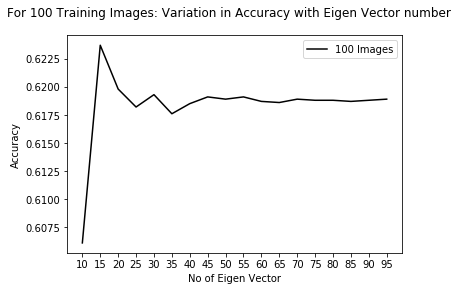

In [49]:
plot4 = plt.plot(eig_size4, accuracy_measure4, '-', c = ('black'), label = '100 Images')
plt.suptitle('For 100 Training Images: Variation in Accuracy with Eigen Vector number')
plt.xlabel('No of Eigen Vector')
plt.ylabel('Accuracy')
plt.xticks(eig_size4)
plt.legend()
plt.savefig('plot1.png', dpi = 100)
plt.show()


## Using 200 Training Images and varying Eigen Vector size from 10 to maximum value

In [50]:
accuracy_measure5 = []
eig_size5 = []
train_size = 200
for v in range(10,train_size,int(train_size/20)):
    trainImages = images['trainImages']
    trainLabels = images['trainLabels']
    testImages = images['testImages']
    testLabels = images['testLabels']
    
    trainImages = trainImages.reshape(784, 60000) 
    testImages = testImages.reshape(784, 10000)
    
    train = trainImages[:,:train_size] #Taking differnt no of Images for analysis
    
    train_ave = train.mean(1)
    train_ave = train_ave.reshape(train_ave.size,1)
    
    train_final = train - train_ave 
    test_final = testImages - train_ave
    
    B = np.matmul(train_final.T, train_final) 
    
    val, vec = LA.eig(B)
    val_sorted = np.sort(val)
    vec_sorted = vec[:, val.argsort()[::-1]]

    eig_cov = np.dot(train_final,vec_sorted)  #train_size X 784 #matmul and dot does the same thing
   
    eig_cov = eig_cov[:,:v]

    eig_cov_t = eig_cov.T

    train_proj = np.dot(eig_cov_t, train_final)
    test_proj = np.dot(eig_cov_t, test_final)
    
    train_proj_labels = trainLabels.flatten()[:train_size]
    test_proj_labels = testLabels.flatten()

    xtrain, ytrain, xtest, ytest = train_proj.T, train_proj_labels, test_proj.T, test_proj_labels

    model = KNeighborsClassifier()
    model.fit(xtrain,ytrain)
    expected = ytest
    predicted = model.predict(xtest)
    accuracy = accuracy_score(expected, predicted)
    
    eig_size5.append(v)
    accuracy_measure5.append(accuracy)

print("For 200 Training Images :")
print("eig_size: " + str(eig_size5)), print("accuracy:" + str(accuracy_measure5))




For 200 Training Images :
eig_size: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]
accuracy:[0.67830000000000001, 0.7046, 0.70669999999999999, 0.70599999999999996, 0.70569999999999999, 0.70530000000000004, 0.70509999999999995, 0.70499999999999996, 0.70489999999999997, 0.70489999999999997, 0.70479999999999998, 0.70489999999999997, 0.70489999999999997, 0.70489999999999997, 0.70489999999999997, 0.70489999999999997, 0.70489999999999997, 0.70489999999999997, 0.70489999999999997]


(None, None)

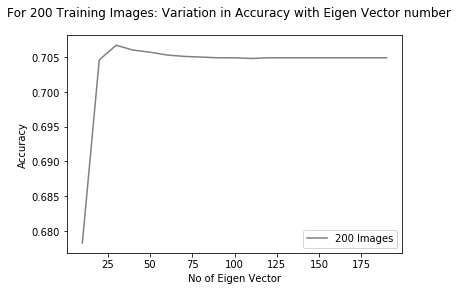

In [51]:
plot5= plt.plot(eig_size5, accuracy_measure5, '-', c = ('gray'), label = '200 Images')
plt.suptitle('For 200 Training Images: Variation in Accuracy with Eigen Vector number')
plt.xlabel('No of Eigen Vector')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('plot2.png', dpi = 100)
plt.show()


## Using 500 Training Images and varying Eigen Vector size from 10 to maximum value

In [52]:
accuracy_measure6 = []
eig_size6 = []
train_size = 500
for v in range(10,train_size,int(train_size/20)):
    trainImages = images['trainImages']
    trainLabels = images['trainLabels']
    testImages = images['testImages']
    testLabels = images['testLabels']
    
    trainImages = trainImages.reshape(784, 60000) 
    testImages = testImages.reshape(784, 10000)
    
    train = trainImages[:,:train_size] #Taking differnt no of Images for analysis
    
    train_ave = train.mean(1)
    train_ave = train_ave.reshape(train_ave.size,1)
    
    train_final = train - train_ave 
    test_final = testImages - train_ave
    
    B = np.matmul(train_final.T, train_final) 
    
    val, vec = LA.eig(B)
    val_sorted = np.sort(val)
    vec_sorted = vec[:, val.argsort()[::-1]]

    eig_cov = np.dot(train_final,vec_sorted)  #train_size X 784 #matmul and dot does the same thing
   
    eig_cov = eig_cov[:,:v]

    eig_cov_t = eig_cov.T

    train_proj = np.dot(eig_cov_t, train_final)
    test_proj = np.dot(eig_cov_t, test_final)
    
    train_proj_labels = trainLabels.flatten()[:train_size]
    test_proj_labels = testLabels.flatten()

    xtrain, ytrain, xtest, ytest = train_proj.T, train_proj_labels, test_proj.T, test_proj_labels

    model = KNeighborsClassifier()
    model.fit(xtrain,ytrain)
    expected = ytest
    predicted = model.predict(xtest)
    accuracy = accuracy_score(expected, predicted)
    
    eig_size6.append(v)
    accuracy_measure6.append(accuracy)

print("For a Training Images of 500 numbers: ")
print("eig_size: " + str(eig_size6)), print("accuracy:" + str(accuracy_measure6))





For a Training Images of 500 numbers: 
eig_size: [10, 35, 60, 85, 110, 135, 160, 185, 210, 235, 260, 285, 310, 335, 360, 385, 410, 435, 460, 485]
accuracy:[0.77349999999999997, 0.81000000000000005, 0.81020000000000003, 0.80979999999999996, 0.80979999999999996, 0.80989999999999995, 0.80979999999999996, 0.80979999999999996, 0.80979999999999996, 0.80979999999999996, 0.80979999999999996, 0.80979999999999996, 0.80979999999999996, 0.80979999999999996, 0.80979999999999996, 0.80979999999999996, 0.80979999999999996, 0.80979999999999996, 0.80979999999999996, 0.80979999999999996]


(None, None)

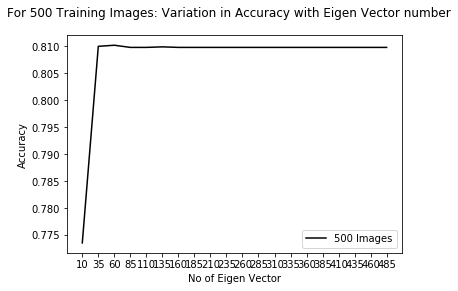

In [53]:
plot6= plt.plot(eig_size6, accuracy_measure6, '-', c = ('black'), label = '500 Images')
plt.suptitle('For 500 Training Images: Variation in Accuracy with Eigen Vector number')
plt.xlabel('No of Eigen Vector')
plt.ylabel('Accuracy')
plt.xticks(eig_size6)
plt.legend()
plt.show()

## Using 700 Training Images and varying Eigen Vector size from 10 to maximum value

In [54]:
accuracy_measure7 = []
eig_size7 = []
train_size = 700
for v in range(10,train_size,int(train_size/20)):
    trainImages = images['trainImages']
    trainLabels = images['trainLabels']
    testImages = images['testImages']
    testLabels = images['testLabels']
    
    trainImages = trainImages.reshape(784, 60000) 
    testImages = testImages.reshape(784, 10000)
    
    train = trainImages[:,:train_size] #Taking differnt no of Images for analysis
    
    train_ave = train.mean(1)
    train_ave = train_ave.reshape(train_ave.size,1)
    
    train_final = train - train_ave 
    test_final = testImages - train_ave
    
    B = np.matmul(train_final.T, train_final) 
    
    val, vec = LA.eig(B)
    val_sorted = np.sort(val)
    vec_sorted = vec[:, val.argsort()[::-1]]

    eig_cov = np.dot(train_final,vec_sorted)  #train_size X 784 #matmul and dot does the same thing
   
    eig_cov = eig_cov[:,:v]

    eig_cov_t = eig_cov.T

    train_proj = np.dot(eig_cov_t, train_final)
    test_proj = np.dot(eig_cov_t, test_final)
    
    train_proj_labels = trainLabels.flatten()[:train_size]
    test_proj_labels = testLabels.flatten()

    xtrain, ytrain, xtest, ytest = train_proj.T, train_proj_labels, test_proj.T, test_proj_labels

    model = KNeighborsClassifier()
    model.fit(xtrain,ytrain)
    expected = ytest
    predicted = model.predict(xtest)
    accuracy = accuracy_score(expected, predicted)
    
    eig_size7.append(v)
    accuracy_measure7.append(accuracy)

print("For 700 Training Images of  : ")
print("eig_size: " + str(eig_size7)), print("accuracy:" + str(accuracy_measure7))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:382: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


For 700 Training Images of  : 
eig_size: [10, 45, 80, 115, 150, 185, 220, 255, 290, 325, 360, 395, 430, 465, 500, 535, 570, 605, 640, 675]
accuracy:[0.80369999999999997, 0.84319999999999995, 0.84319999999999995, 0.84299999999999997, 0.84330000000000005, 0.84330000000000005, 0.84330000000000005, 0.84340000000000004, 0.84340000000000004, 0.84340000000000004, 0.84340000000000004, 0.84340000000000004, 0.84340000000000004, 0.84340000000000004, 0.84340000000000004, 0.84340000000000004, 0.84340000000000004, 0.84340000000000004, 0.84340000000000004, 0.84340000000000004]


(None, None)

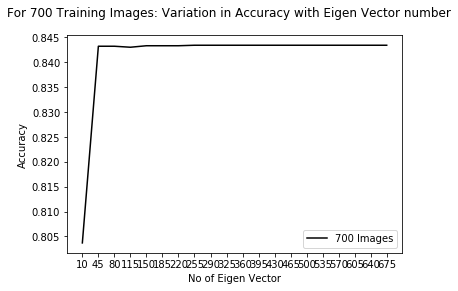

In [55]:
plot7= plt.plot(eig_size7, accuracy_measure7, '-', c = ('black'), label = '700 Images')
plt.suptitle('For 700 Training Images: Variation in Accuracy with Eigen Vector number')
plt.xlabel('No of Eigen Vector')
plt.ylabel('Accuracy')
plt.xticks(eig_size7)
plt.legend()
plt.show()

In [56]:
## Let's have a comparative plot of various training size with fix no of eigen vectors

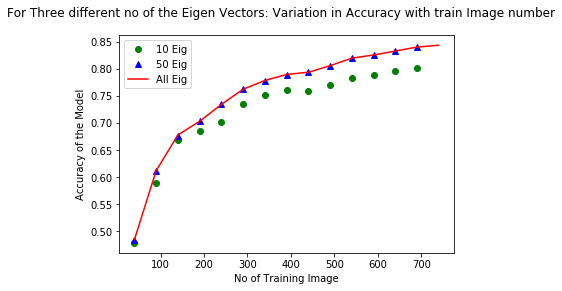

In [57]:
plt.plot(train_size1, accuracy_measure1, 'go', label = '10 Eig')
plt.plot(train_size2, accuracy_measure2, 'b^', label = '50 Eig')
plt.plot(train_size3, accuracy_measure3, 'r-', label = 'All Eig' )

plt.suptitle('For Three different no of the Eigen Vectors: Variation in Accuracy with train Image number')
plt.xlabel('No of Training Image')
plt.ylabel('Accuracy of the Model')
plt.legend()
plt.savefig('plot3.png', dpi = 100)


plt.show()


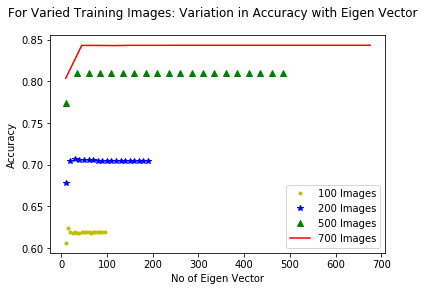

In [58]:
plt.plot(eig_size4, accuracy_measure4, 'y.', label = '100 Images')
plt.plot(eig_size5, accuracy_measure5, 'b*', label = '200 Images')
plt.plot(eig_size6, accuracy_measure6, 'g^', label = '500 Images')
plt.plot(eig_size7, accuracy_measure7, 'r-', label = '700 Images')

plt.suptitle('For Varied Training Images: Variation in Accuracy with Eigen Vector')
plt.xlabel('No of Eigen Vector')
plt.ylabel('Accuracy')

plt.legend()
plt.savefig('plot4.png', dpi = 100)
plt.show()


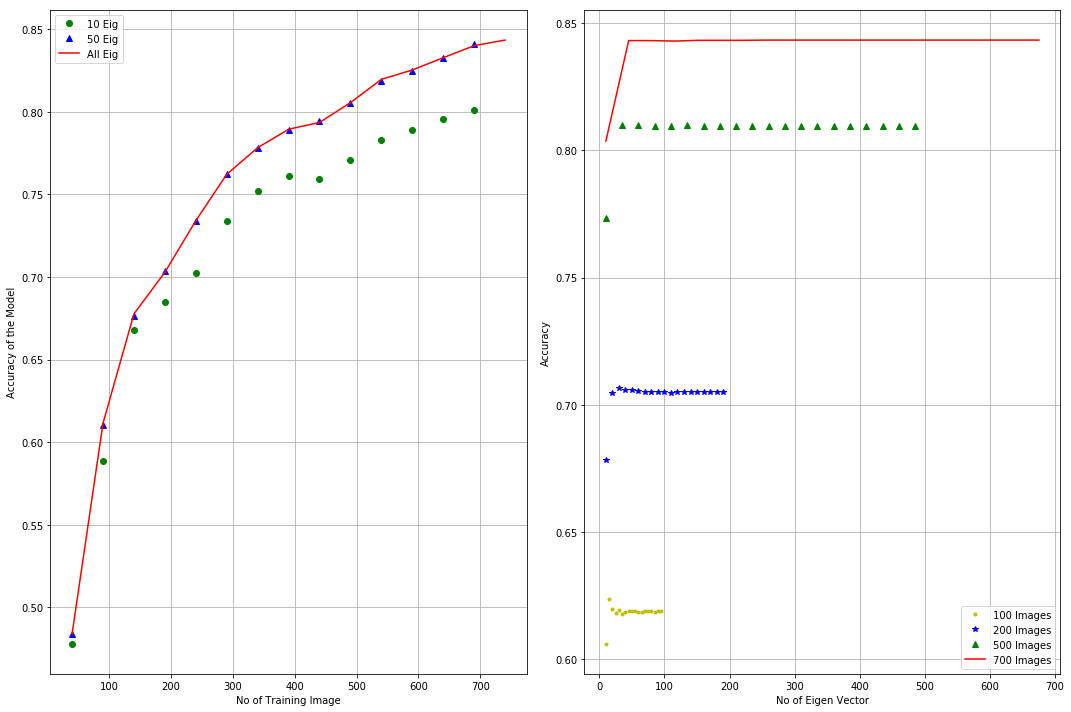

In [59]:
fig1 = plt.figure(figsize=(15,10))
#plt.subplots(1,2)
plt.subplot(121)

plt.plot(train_size1, accuracy_measure1, 'go', label = '10 Eig')
plt.plot(train_size2, accuracy_measure2, 'b^', label = '50 Eig')
plt.plot(train_size3, accuracy_measure3, 'r-', label = 'All Eig' )

#plt.suptitle('For Three different no of the Eigen Vectors: Variation in Accuracy with train Image number')
plt.xlabel('No of Training Image')
plt.ylabel('Accuracy of the Model')
plt.legend()
plt.grid(True)


plt.subplot(122)

plt.plot(eig_size4, accuracy_measure4, 'y.', label = '100 Images')
plt.plot(eig_size5, accuracy_measure5, 'b*', label = '200 Images')
plt.plot(eig_size6, accuracy_measure6, 'g^', label = '500 Images')
plt.plot(eig_size7, accuracy_measure7, 'r-', label = '700 Images')

#plt.suptitle('For Varied Training Images: Variation in Accuracy with Eigen Vector')
plt.xlabel('No of Eigen Vector')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.grid(True)
plt.legend()
plt.savefig('plot5.png', dpi = 100)
plt.show()


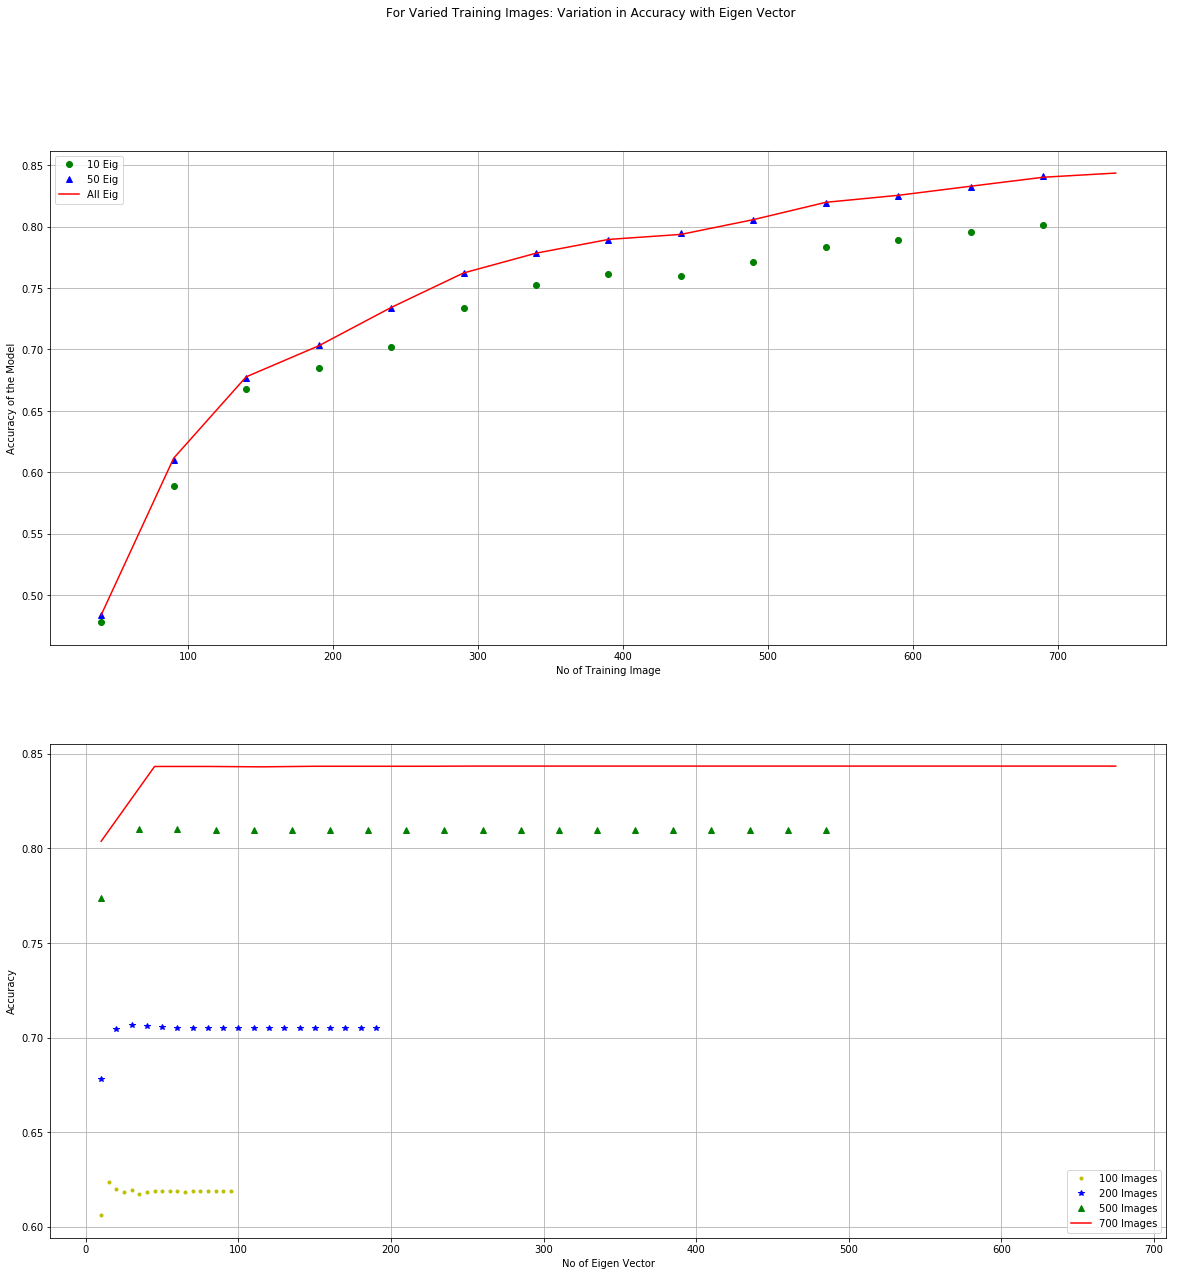

In [60]:
fig1 = plt.figure(figsize=(20,20))
#plt.subplots(1,2)
ax1=plt.subplot(211)

ax1.plot(train_size1, accuracy_measure1, 'go', label = '10 Eig')
ax1.plot(train_size2, accuracy_measure2, 'b^', label = '50 Eig')
ax1.plot(train_size3, accuracy_measure3, 'r-', label = 'All Eig')
#ax1.set_xlim(train_size3)



plt.suptitle('For Three different no of the Eigen Vectors: Variation in Accuracy with train Image number')
plt.xlabel('No of Training Image')
plt.ylabel('Accuracy of the Model')
plt.legend()
plt.grid(True)


ax2=plt.subplot(212)

ax2.plot(eig_size4, accuracy_measure4, 'y.', label = '100 Images')
ax2.plot(eig_size5, accuracy_measure5, 'b*', label = '200 Images')
ax2.plot(eig_size6, accuracy_measure6, 'g^', label = '500 Images')
ax2.plot(eig_size7, accuracy_measure7, 'r-', label = '700 Images')
#plt.set_xlim(eig_size7)



plt.suptitle('For Varied Training Images: Variation in Accuracy with Eigen Vector')
plt.xlabel('No of Eigen Vector')
plt.ylabel('Accuracy')

#plt.tight_layout
plt.legend()
plt.grid(True)
plt.show()
